<a href="https://colab.research.google.com/github/Nazacyn/FordGoBike-project/blob/main/Develhope_FordGoBike_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark py4j


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

In [ ]:
spark = SparkSession.builder.appName("Thirdproject").getOrCreate()

In [ ]:
spark

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = spark.read.csv("/content/drive/MyDrive/2017-fordgobike-tripdata.csv", header=True, inferSchema=True)
df1 = spark.read.csv("/content/drive/MyDrive/Colab Notebooks/2017-fordgobike-tripdata.csv", header=True, inferSchema=True)

In [ ]:
df.show(5)

+------------+--------------------+--------------------+----------------+--------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+-------+----------+-----------------+-------------+
|duration_sec|          start_time|            end_time|start_station_id|  start_station_name|start_station_latitude|start_station_longitude|end_station_id|    end_station_name|end_station_latitude|end_station_longitude|bike_id| user_type|member_birth_year|member_gender|
+------------+--------------------+--------------------+----------------+--------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+-------+----------+-----------------+-------------+
|       80110|2017-12-31 16:57:...|2018-01-01 15:12:...|              74|Laguna St at Haye...|    37.776434819204745|    -122.42624402046204|            43|San Francisco Pub...|       

In [ ]:
df.printSchema()

root
 |-- duration_sec: integer (nullable = true)
 |-- start_time: timestamp (nullable = true)
 |-- end_time: timestamp (nullable = true)
 |-- start_station_id: integer (nullable = true)
 |-- start_station_name: string (nullable = true)
 |-- start_station_latitude: double (nullable = true)
 |-- start_station_longitude: double (nullable = true)
 |-- end_station_id: integer (nullable = true)
 |-- end_station_name: string (nullable = true)
 |-- end_station_latitude: double (nullable = true)
 |-- end_station_longitude: double (nullable = true)
 |-- bike_id: integer (nullable = true)
 |-- user_type: string (nullable = true)
 |-- member_birth_year: integer (nullable = true)
 |-- member_gender: string (nullable = true)



In [ ]:
df.toPandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int32         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  int32         
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  int32         
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  int32         
 12  user_type       

In [ ]:
df = df.dropna(how='any')

In [ ]:
df1 = df1.dropna(how='any')

In [ ]:
df.toPandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453159 entries, 0 to 453158
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             453159 non-null  int32         
 1   start_time               453159 non-null  datetime64[ns]
 2   end_time                 453159 non-null  datetime64[ns]
 3   start_station_id         453159 non-null  int32         
 4   start_station_name       453159 non-null  object        
 5   start_station_latitude   453159 non-null  float64       
 6   start_station_longitude  453159 non-null  float64       
 7   end_station_id           453159 non-null  int32         
 8   end_station_name         453159 non-null  object        
 9   end_station_latitude     453159 non-null  float64       
 10  end_station_longitude    453159 non-null  float64       
 11  bike_id                  453159 non-null  int32         
 12  user_type       

 ##  1 - Calculate distance of each trip using haversine library and add the result to the dataset


In [ ]:
pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pyspark.sql.functions import *
from pyspark.sql.types import *
from haversine import haversine, Unit


convertUDF = udf(lambda start_lat, start_lon, end_lat, end_lon: haversine((start_lat, start_lon), (end_lat, end_lon), unit=Unit.MILES), DoubleType())

df = df.withColumn('distance_miles', round(convertUDF('start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'), 2))

# show the updated DataFrame
df.select(col('distance_miles')).show()

+--------------+
|distance_miles|
+--------------+
|          0.59|
|          1.91|
|           0.4|
|           0.0|
|          0.94|
|          0.94|
|          0.65|
|          0.65|
|          1.77|
|          1.78|
|          0.55|
|          1.12|
|          0.39|
|          0.39|
|          1.11|
|          1.16|
|          0.21|
|          0.57|
|          0.47|
|          1.22|
+--------------+
only showing top 20 rows



  ## 2 - Calculate the duration in seconds of each trip


In [ ]:
df = df.withColumn('Duration_In_Seconds', unix_timestamp("end_time") - unix_timestamp('start_time'))
df.select(col('Duration_In_Seconds')).show()

+-------------------+
|Duration_In_Seconds|
+-------------------+
|              80111|
|              78801|
|              43603|
|               4507|
|               2183|
|               2171|
|               1545|
|               1474|
|               1532|
|               1217|
|                386|
|                422|
|                871|
|                734|
|                782|
|                475|
|                153|
|                250|
|                243|
|                833|
+-------------------+
only showing top 20 rows



  ##  3 - By assuming each minute cost 0.35 cent calculate the fee for each trip

In [ ]:
#Calculate trip fee from duration in seconds
trip_fee = (col("Duration_In_Seconds") / 60.0) * 0.35

# Add trip_fee column to the DataFrame
df = df.withColumn("trip_fee_USD", trip_fee)

#round to two decimals
df = df.withColumn("trip_fee_USD", round(col("trip_fee_USD"), 2))
df.select(col('Duration_In_Seconds'), col('trip_fee_USD')).show()

+-------------------+------------+
|Duration_In_Seconds|trip_fee_USD|
+-------------------+------------+
|              80111|      467.31|
|              78801|      459.67|
|              43603|      254.35|
|               4507|       26.29|
|               2183|       12.73|
|               2171|       12.66|
|               1545|        9.01|
|               1474|         8.6|
|               1532|        8.94|
|               1217|         7.1|
|                386|        2.25|
|                422|        2.46|
|                871|        5.08|
|                734|        4.28|
|                782|        4.56|
|                475|        2.77|
|                153|        0.89|
|                250|        1.46|
|                243|        1.42|
|                833|        4.86|
+-------------------+------------+
only showing top 20 rows



##1 - Calculate the total distance for each bike and list the top 10

In [ ]:
top_10_bikes = df.groupBy('bike_id').agg(sum('distance_miles').alias('total_distance')).orderBy(col('total_distance').desc()).limit(10)
top_10_bikes = top_10_bikes.select('bike_id', round('total_distance', 2).alias('total_distance'))

top_10_bikes.show()

+-------+--------------+
|bike_id|total_distance|
+-------+--------------+
|   2178|        404.42|
|     68|        396.15|
|    441|        363.53|
|    235|        363.41|
|    231|        360.14|
|    602|        358.95|
|   1665|        353.93|
|   1339|         352.8|
|    256|        352.09|
|   2226|        351.03|
+-------+--------------+



## 2- Calculate the number of trips for each start station list top 10 and find the ratio of using as male or female

In [ ]:
top_10_start_stations = df.groupBy('start_station_name', 'start_station_id').agg(count('start_station_id').alias('trip_count')).orderBy(col('trip_count').desc()).limit(10)
top_10_start_stations.show()

+--------------------+----------------+----------+
|  start_station_name|start_station_id|trip_count|
+--------------------+----------------+----------+
|San Francisco Cal...|              30|     11929|
|San Francisco Cal...|              67|     11627|
|San Francisco Fer...|              15|     11507|
|Market St at 10th St|              58|     10910|
|  Berry St at 4th St|              81|     10140|
|Montgomery St BAR...|              21|     10041|
|Howard St at Beal...|              22|      9569|
|The Embarcadero a...|               6|      9501|
|Steuart St at Mar...|              16|      8369|
|Powell St BART St...|               3|      7902|
+--------------------+----------------+----------+



In [ ]:
# find the ratio of using as male or female
gender_trip_count = df.where(df['member_gender'].isin(['Male', 'Female'])).groupBy('start_station_name').agg(
    sum(when(df['member_gender'] == 'Male', 1).otherwise(0)).alias('male_trip_count'),
    sum(when(df['member_gender'] == 'Female', 1).otherwise(0)).alias('female_trip_count'))

gender_ratio = gender_trip_count.withColumn('male_female_ratio', round((gender_trip_count['male_trip_count'] / gender_trip_count['female_trip_count']), 2))

ratio = gender_trip_count.select(sum('male_trip_count')/ sum('female_trip_count')).alias('male_female_ratio')
ratio.show()

+-----------------------------------------------+
|(sum(male_trip_count) / sum(female_trip_count))|
+-----------------------------------------------+
|                             3.5347161616366627|
+-----------------------------------------------+



## Make a comparison to find the percentage of usage for customer and subscriber


In [ ]:
# Group trips by user type and count number of trips
trips_by_user_type = df.groupBy("user_type").agg(count("*").alias("num_trips"))

# Calculate total number of trips
total_trips = df.count()

# Calculate percentage of trips for each user type
trips_by_user_type = trips_by_user_type.withColumn("percent_trips", round((100 * col("num_trips") / total_trips), 2))
trips_by_user_type.show()
trips_by_user_type_pd = trips_by_user_type.toPandas()

+----------+---------+-------------+
| user_type|num_trips|percent_trips|
+----------+---------+-------------+
|Subscriber|   404424|        89.25|
|  Customer|    48735|        10.75|
+----------+---------+-------------+



## 4 - Calculate the age of all users and show the relation between the distance and the age

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Calculate age of each user
current_year = int(datetime.date.today().strftime("%Y"))
df = df.withColumn("age", current_year - col("member_birth_year"))


pandas_df = df.select(['distance_miles', 'age']).toPandas()

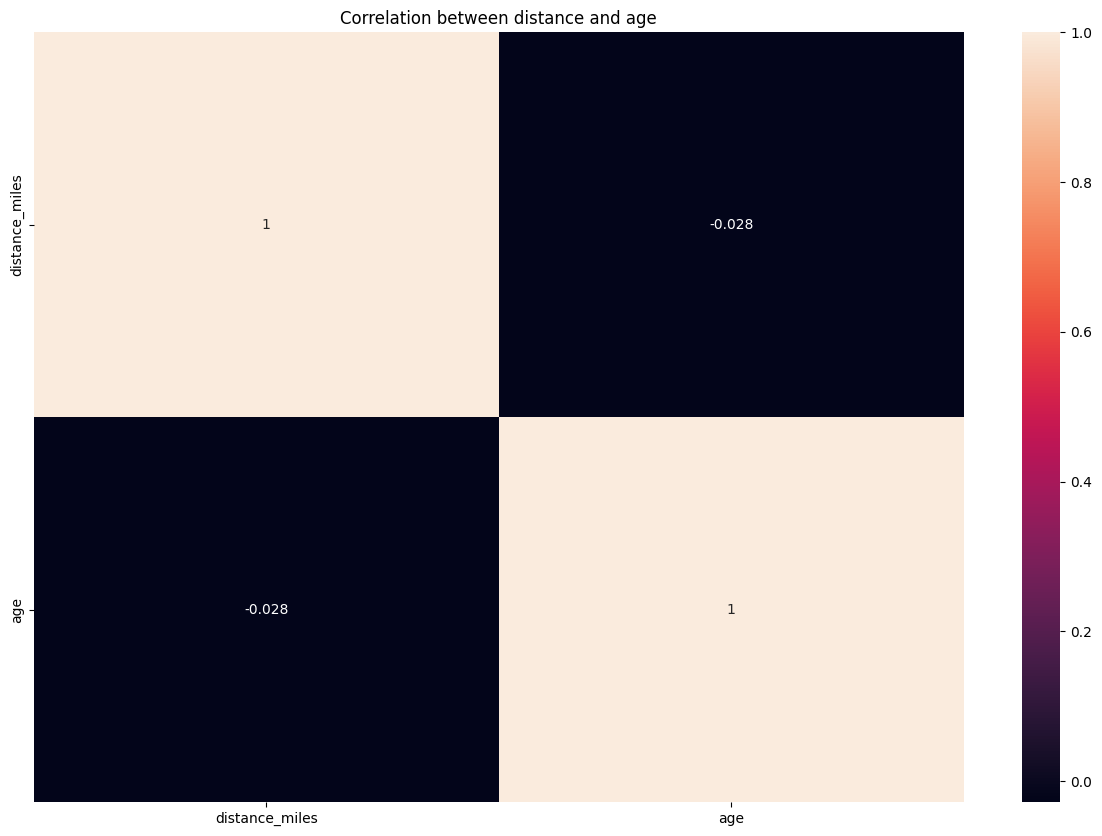

In [ ]:
# Create a heatmap to show the correlation between distance and age
plt.figure(figsize=(15,10))
sns.heatmap(pandas_df.corr(), annot=True)
plt.title('Correlation between distance and age')
plt.show()

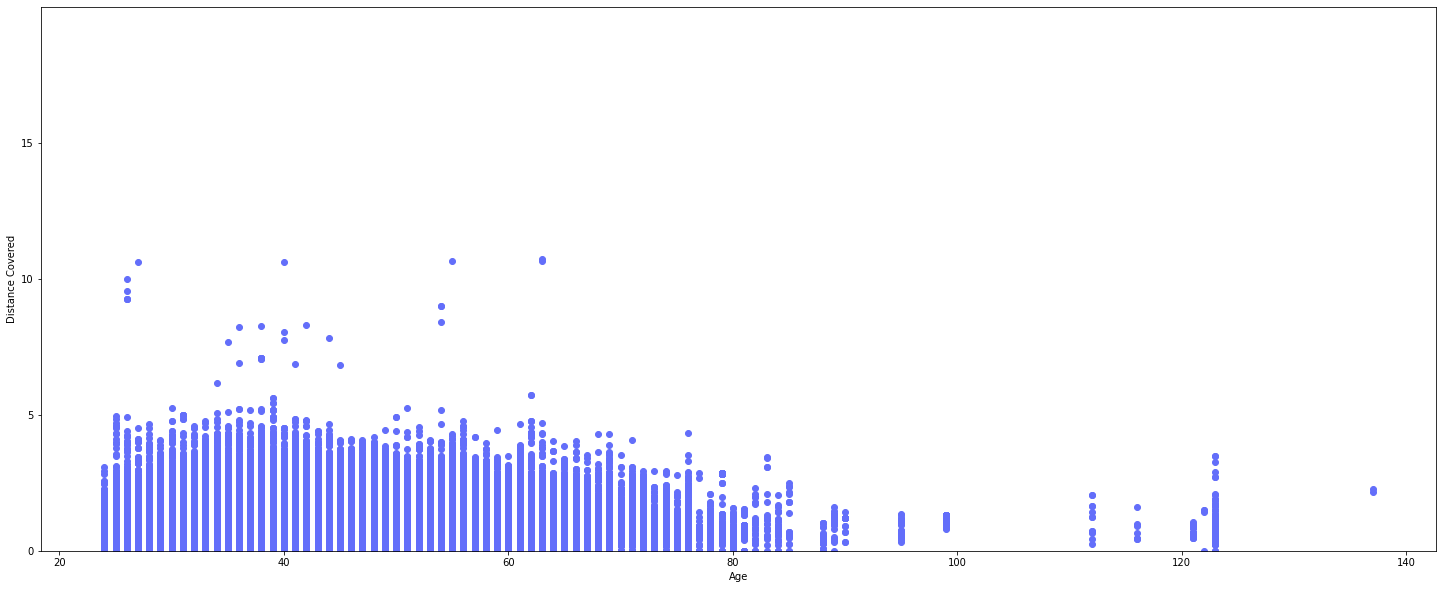

In [ ]:
x = pandas_df["age"]
y = pandas_df["distance_miles"]

# Create scatter plot
plt.figure(figsize=(25,10))
plt.scatter(x, y, color='#636efa')
plt.ylim(1, 20)
plt.yticks(range(0, 20, 5))

plt.xlabel("Age")
plt.ylabel("Distance Covered")
#specify axis tick step sizes

plt.show()

  1 - Calculate the total cost for all customers and all subscribers
        2 - Analyze how often bikes are being rented ( morning - afternoon - evening) and at what times of 
           day
        3 -Find if there is a relation between the time and start stations
        4 -What is the ratio of payment using cc or app wallet?
        5-What is the preferred way to pay for customers and subscriber?

## 1- Calculate the total cost for all customers and all subscribers


In [ ]:
# Calculate the total cost for all customers and all subscribers
total_cost = df.groupBy("user_type").agg(sum("trip_fee_USD").alias("total_cost"))
total_cost.show()


+----------+------------------+
| user_type|        total_cost|
+----------+------------------+
|Subscriber|1665713.2400000072|
|  Customer| 537353.9800000038|
+----------+------------------+



## 2- Analyze how often bikes are being rented ( morning - afternoon - evening) and at what times of day

In [ ]:
# Analyze how often bikes are being rented ( morning - afternoon - evening) and at what times of day

+-----------------+------+
|start_time_of_day| count|
+-----------------+------+
|        afternoon|174406|
|          evening|100995|
|          morning|177758|
+-----------------+------+



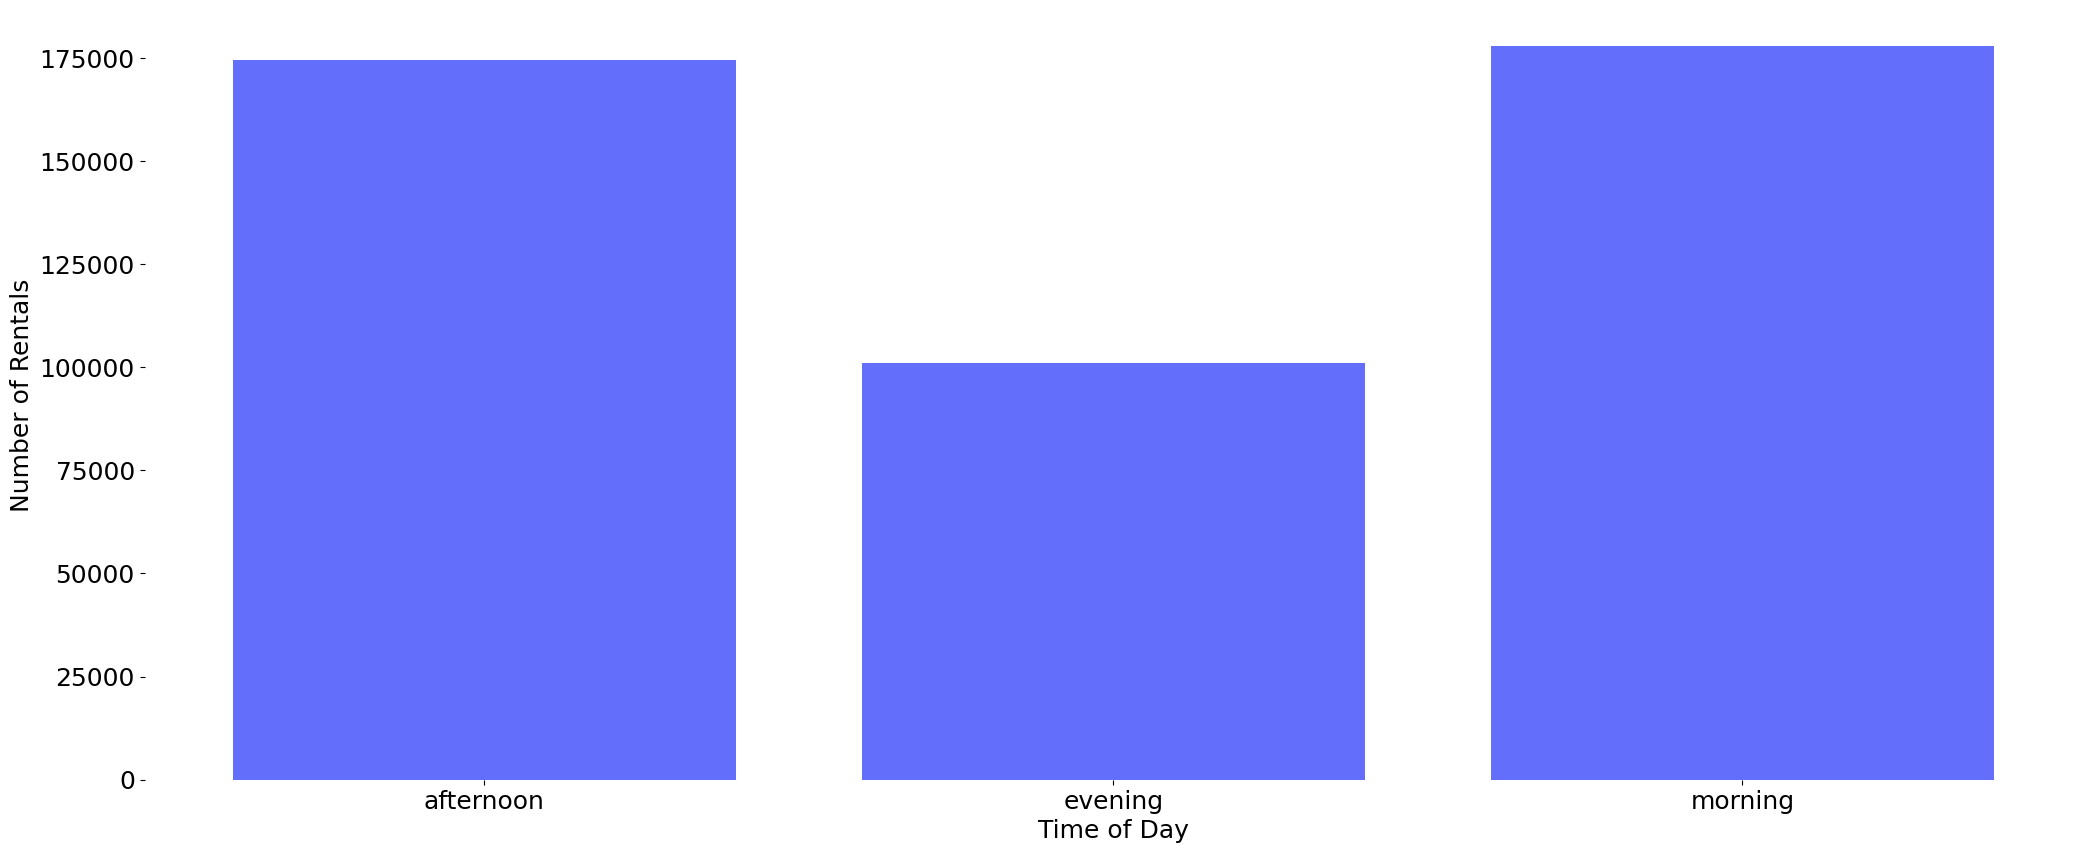

In [ ]:
# Extract the hour of the day from the start_time column
df = df.withColumn("start_hour_of_day", hour(df.start_time))

df = df.withColumn("start_time_of_day", when(df.start_hour_of_day < 12, "morning")
                          .when(df.start_hour_of_day < 18, "afternoon")
                          .otherwise("evening"))

# Group the dataframe by the time of day and count the number of rentals in each group
rentals_by_time_of_day = df.groupBy("start_time_of_day").count().orderBy("start_time_of_day")
rentals_by_time_of_day.show()

rentals_by_time_of_day_pd = rentals_by_time_of_day.toPandas()

# Plot the results to visualize the distribution of rentals across different times of day
plt.figure(figsize=(25,10))
plt.rcParams['font.size'] = 18
plt.bar(rentals_by_time_of_day_pd["start_time_of_day"], rentals_by_time_of_day_pd["count"], color = '#636efa')
plt.xlabel("Time of Day")
plt.ylabel("Number of Rentals")
plt.gca().set_frame_on(False)
plt.show()


In [ ]:
# Extract the hour of the day from the start_time column
df = df.withColumn("start_day_of_month", hour(df.start_time))

# df = df.withColumn("start_time_of_day", when(df.hour_of_day < 12, "morning")
#                           .when(df.hour_of_day < 17, "afternoon")
#                           .otherwise("evening"))

In [ ]:
# Extract the hour of the day from the start_time column
df = df.withColumn("month", hour(df.start_time))

# df = df.withColumn("time_of_day", when(df.hour_of_day < 12, "morning")
#                           .when(df.hour_of_day < 18, "afternoon")
#                           .otherwise("evening"))

## 3- -Find if there is a relation between the time and start stations




In [ ]:
# Group the dataframe by the start_station_id and hour_of_day, and count the number of rentals in each group
rentals_by_start_station_and_time = df.groupBy("start_station_id", "start_station_name", "start_time_of_day", "start_hour_of_day").count()
rentals_by_start_station_and_time.show()


+----------------+--------------------+-----------------+-----------------+-----+
|start_station_id|  start_station_name|start_time_of_day|start_hour_of_day|count|
+----------------+--------------------+-----------------+-----------------+-----+
|             163|Lake Merritt BART...|          evening|               20|  159|
|             112|Harrison St at 17...|          evening|               19|  126|
|              81|  Berry St at 4th St|        afternoon|               16|  611|
|              67|San Francisco Cal...|        afternoon|               14|  106|
|              79|7th St at Brannan St|          morning|                9|  133|
|              44|Civic Center/UN P...|          evening|               23|   42|
|             138|Jersey St at Chur...|          evening|               18|   37|
|             295|William St at 10t...|        afternoon|               17|    6|
|              15|San Francisco Fer...|          evening|               20|  143|
|             10

In [ ]:
# Convert the PySpark dataframe to a pandas dataframe for plotting
rentals_by_start_station_and_time_pd = rentals_by_start_station_and_time.toPandas()

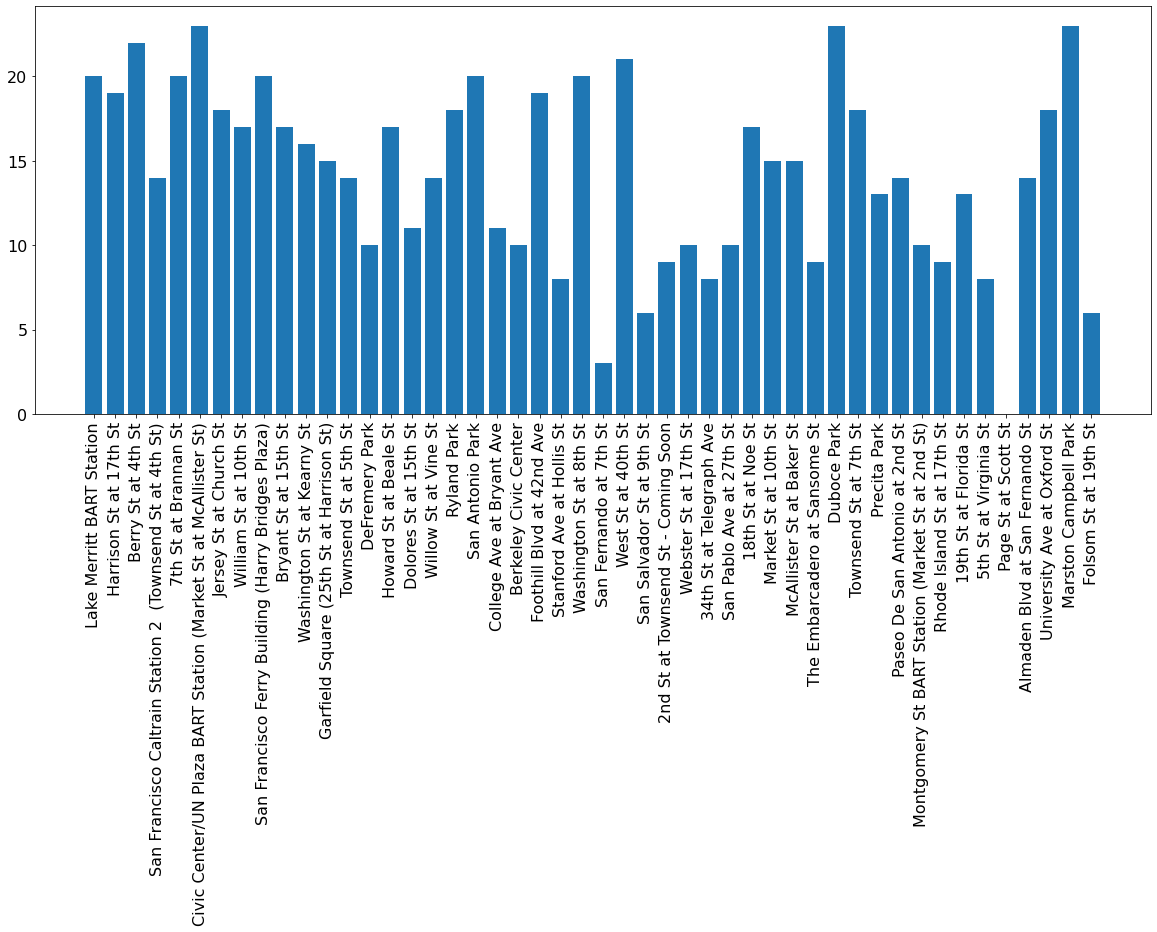

In [ ]:
plt.figure(figsize=(20,7.5))
plt.rcParams['font.size'] = 16
plt.bar(rentals_by_start_station_and_time_pd['start_station_name'].head(50), rentals_by_start_station_and_time_pd['start_hour_of_day'].head(50))
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Group the dataframe by the start_station_name and hour columns, and count the number of rentals in each group
rentals_by_start_station_and_hour = df.groupBy(["start_station_name", "start_hour_of_day"]).agg(count("*").alias("count"))

# Pivot the resulting dataframe to create a matrix of start stations and hours with the count of rentals at each intersection
rentals_by_start_station_and_hour = rentals_by_start_station_and_hour.groupBy("start_station_name", "start_hour_of_day").sum("count")

# Fill any null values with 0
rentals_by_start_station_and_hour = rentals_by_start_station_and_hour.fillna(0)
rentals_by_start_station_and_hour.show()

#rentals_by_start_station_and_hour.corr()

+--------------------+-----------------+----------+
|  start_station_name|start_hour_of_day|sum(count)|
+--------------------+-----------------+----------+
|The Embarcadero a...|               17|       942|
|Central Ave at Fe...|                9|       370|
|Post St at Kearny St|                9|       183|
|    San Pedro Square|                1|         8|
|Derby St at Colle...|               19|         1|
|Morrison Ave at J...|               15|        14|
|San Jose Diridon ...|                8|       496|
|10th St at Fallon St|               17|       168|
|Oregon St at Adel...|               16|        15|
| Broadway at 30th St|               16|        77|
|Marston Campbell ...|               15|         2|
|Embarcadero BART ...|               23|        23|
|McAllister St at ...|               11|        54|
| Broadway at 40th St|                8|       284|
|Father Alfred E B...|                6|       109|
|   45th St at Manila|                6|        60|
|Market St a

## 4- What is the ratio of payment using cc or app wallet

In [ ]:
## What is the ratio of payment using cc or app wallet

In [ ]:
payment_count = df1.groupBy("pyment").agg(count("pyment")).alias('total_payment')

total_payment = payment_count.agg(sum("count(pyment)")).collect()[0][0]
payment_percent = payment_count.withColumn("percent", round((col("count(pyment)") / total_payment)*100, 2))

payment_percent.show()

+-----------+-------------+-------+
|     pyment|count(pyment)|percent|
+-----------+-------------+-------+
| app wallet|       226651|  50.02|
|credit card|       226508|  49.98|
+-----------+-------------+-------+



## 1 - What are the worst starting stations for the business?

In [ ]:
# Group the dataframe by the start_station_name and count the number of rentals in each group
revenue_by_user_type = df.groupBy("start_station_name").agg(sum("duration_sec").alias("total_duration_sec"))
revenue_by_station = revenue_by_user_type.withColumn("total_revenue", col("total_duration_sec") / 60 * 0.15)

# Sort the resulting dataframe by the count column in descending order
worst_starting_stations = revenue_by_station.sort("total_revenue", ascending=True)
worst_starting_stations.show(15)
worst_starting_stations = worst_starting_stations.toPandas()

+--------------------+------------------+------------------+
|  start_station_name|total_duration_sec|     total_revenue|
+--------------------+------------------+------------------+
|Ellsworth St at R...|               483|            1.2075|
|Jackson St at 11t...|               973|2.4324999999999997|
| Empire St at 1st St|              1510|             3.775|
|Harmon St at Adel...|              3597|            8.9925|
|W St John St at G...|              3882|             9.705|
|Pierce Ave at Mar...|              4179|           10.4475|
|Derby St at Colle...|             10814|27.034999999999997|
|Fruitvale BART St...|             11669|29.172499999999996|
|     Bestor Art Park|             15358|38.394999999999996|
|Willow St at Vine St|             18306|            45.765|
|Dolores St at 22n...|             23241|           58.1025|
|Webster St at 19t...|             29379| 73.44749999999999|
|Telegraph Ave at ...|             34182|            85.455|
|13th St at Frankl...|  

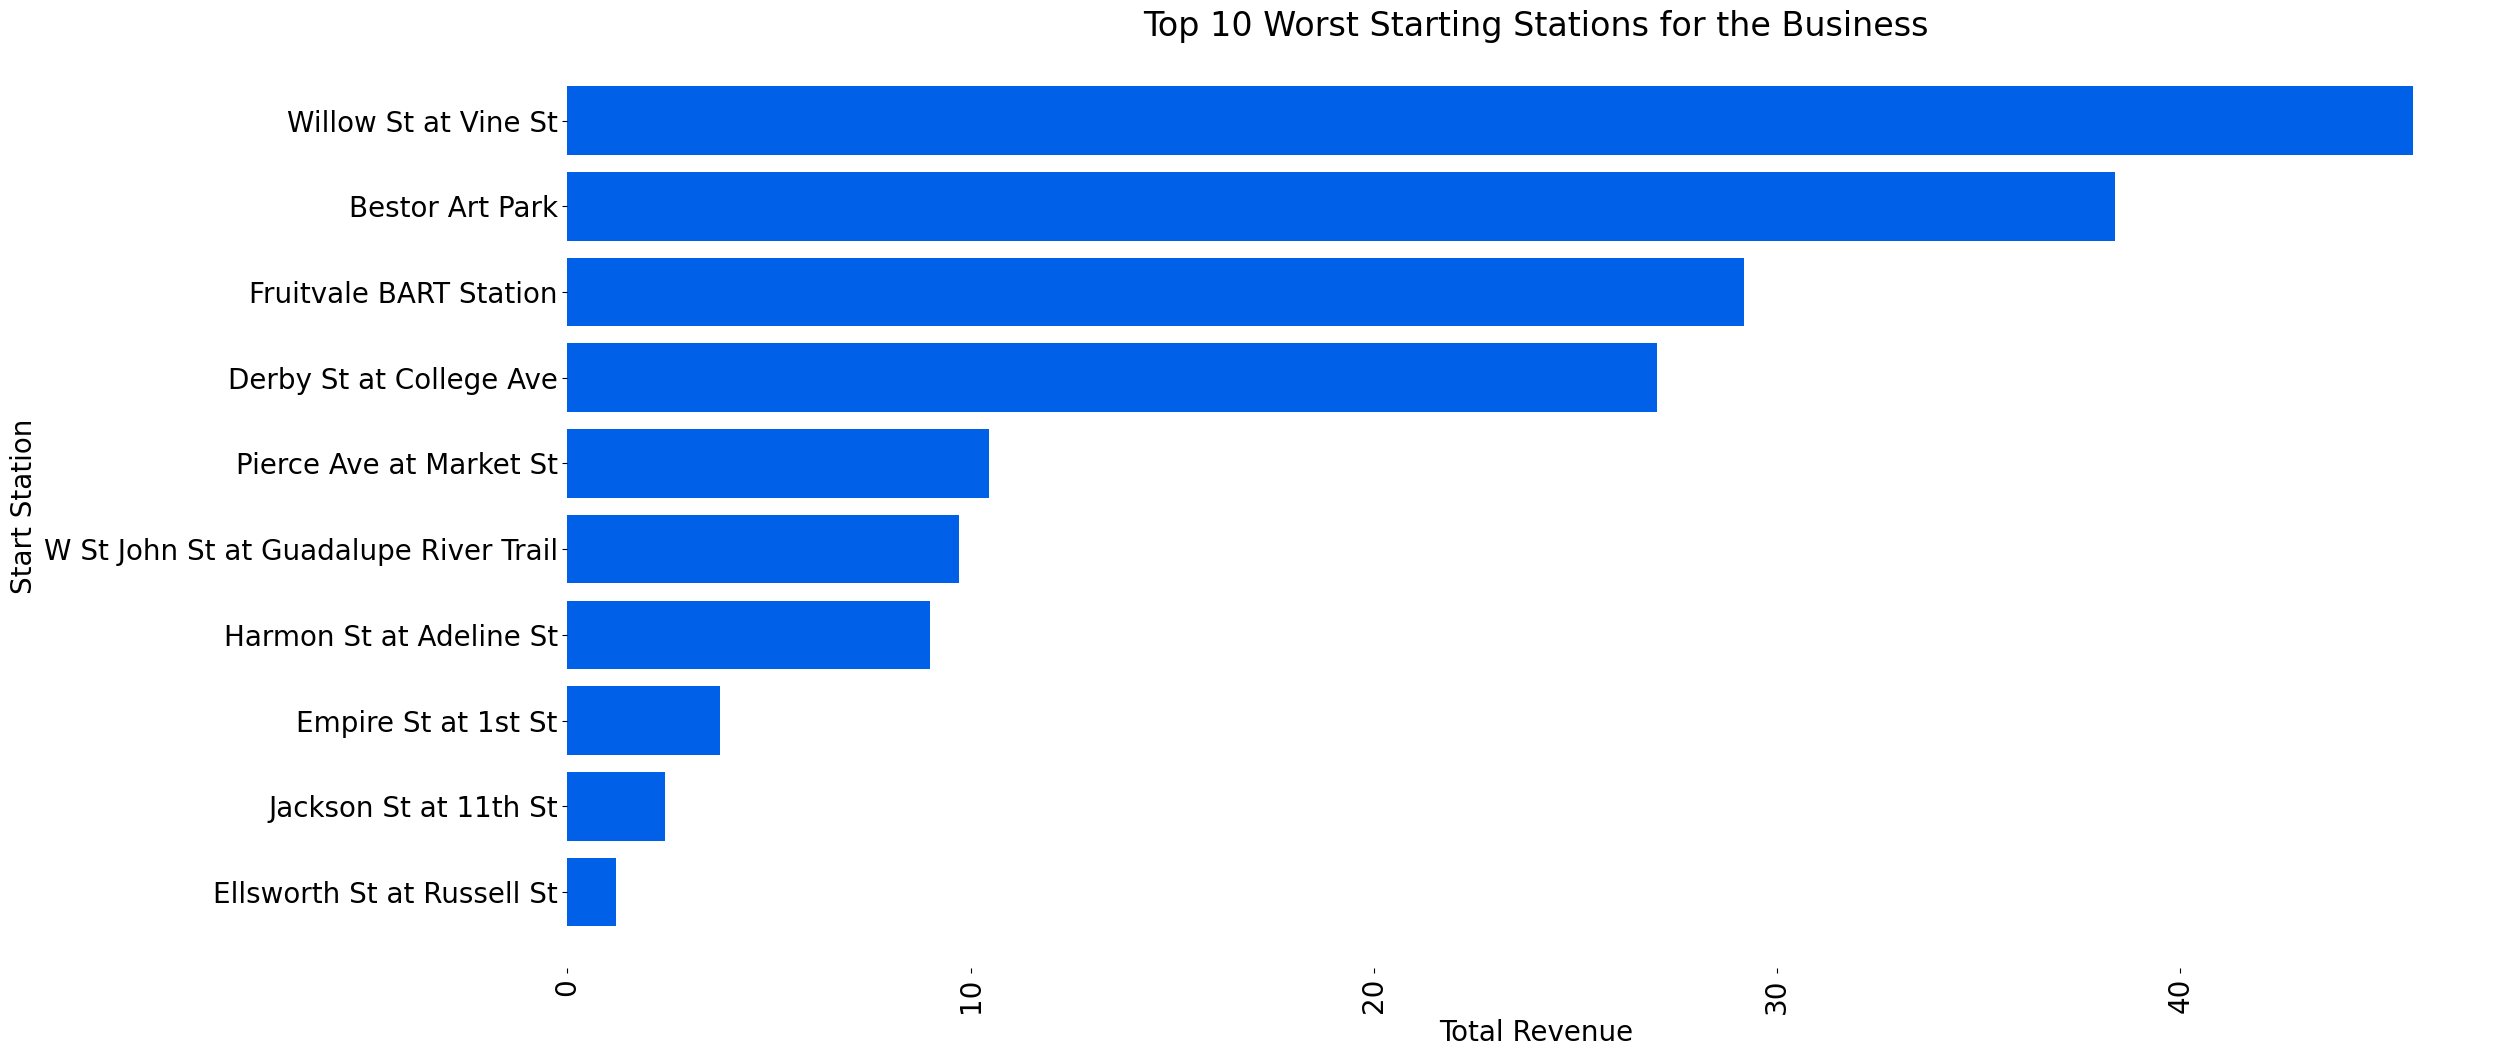

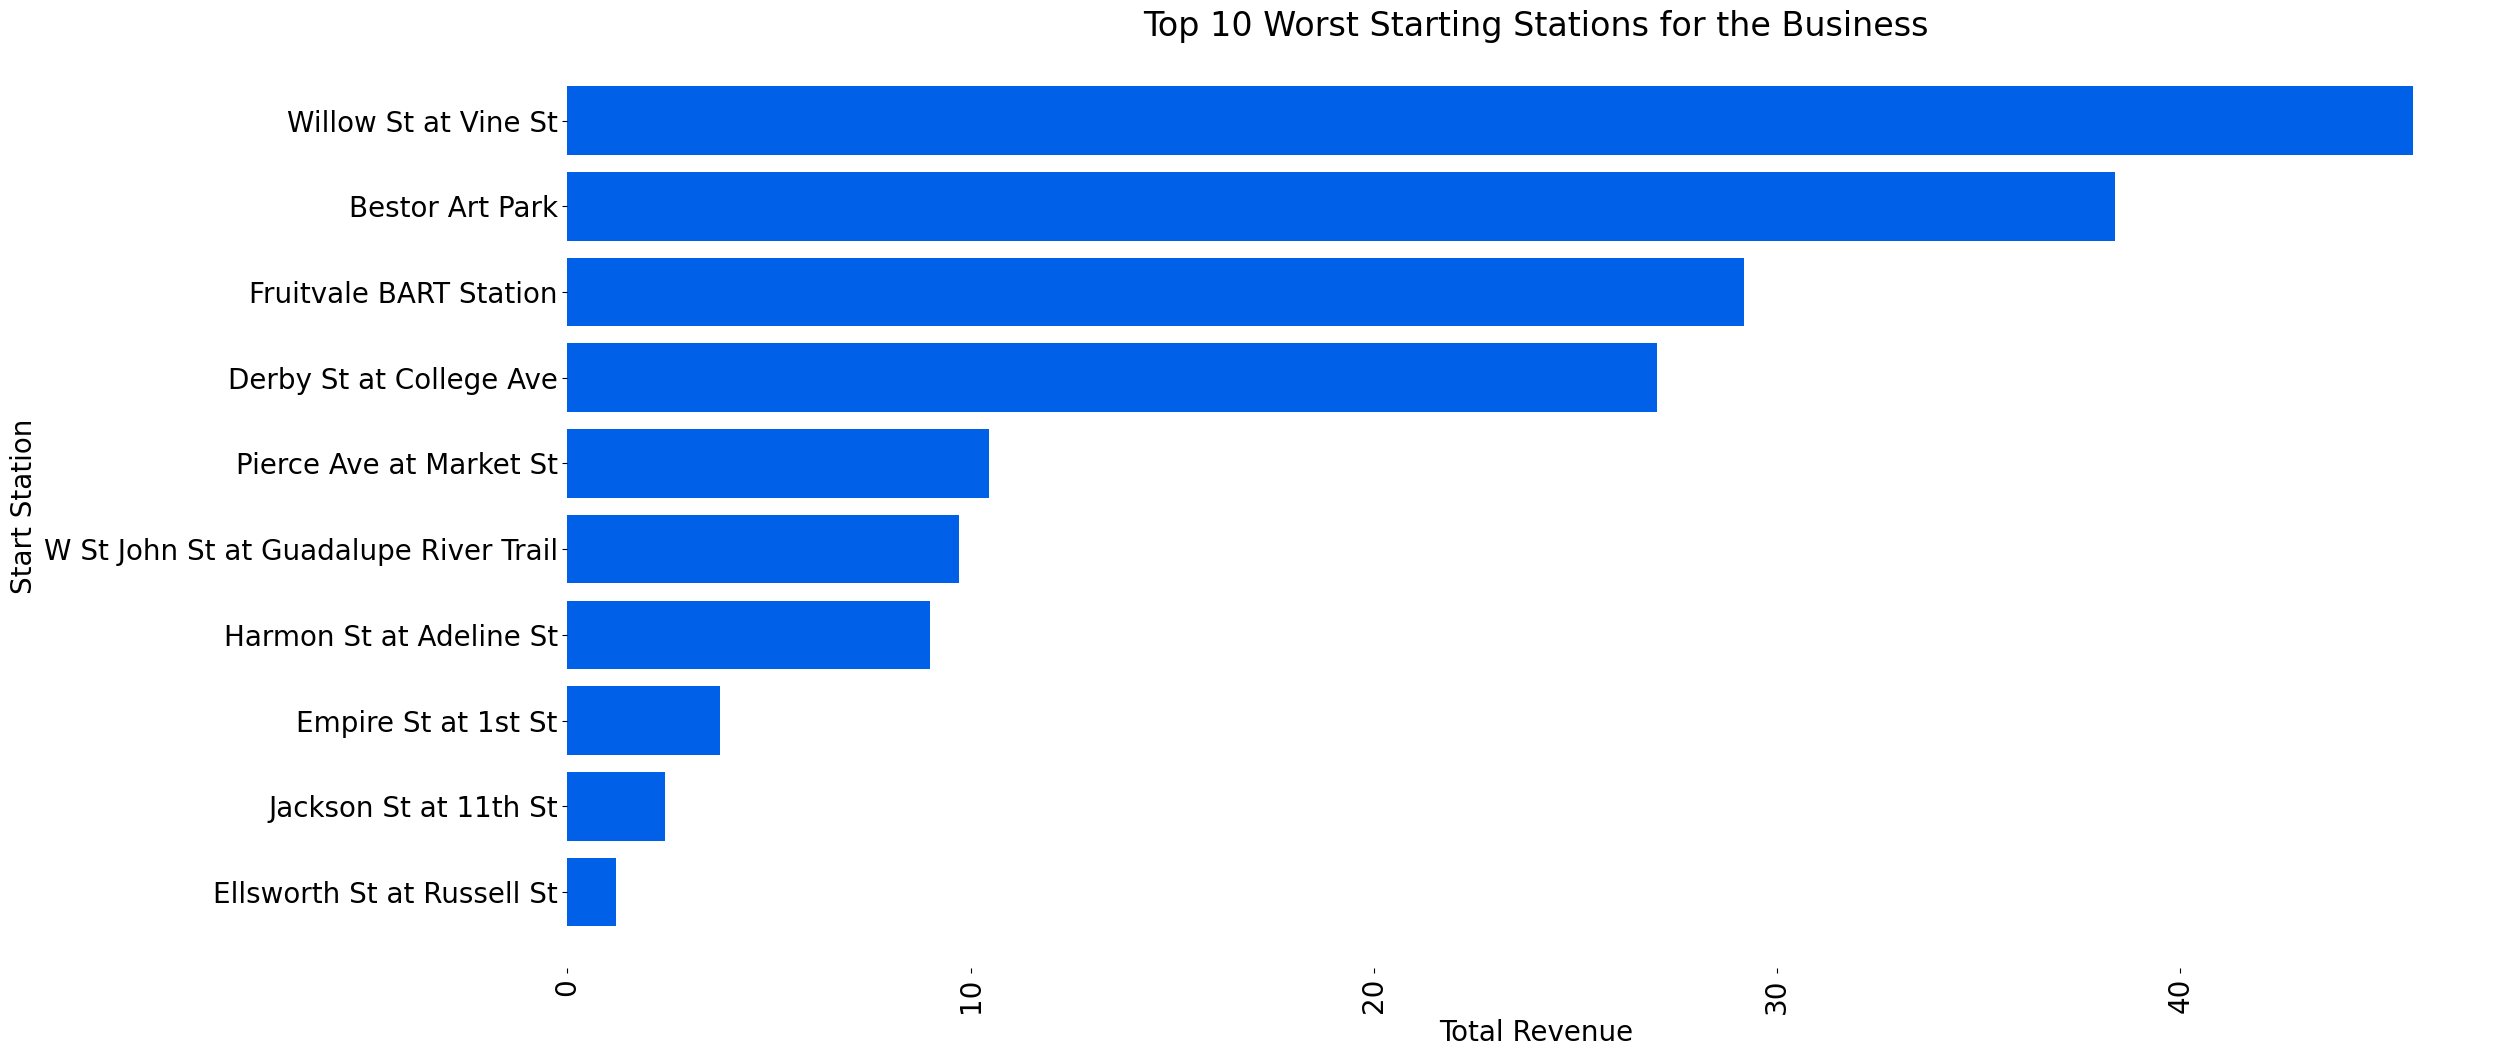

In [ ]:
plt.figure(figsize=(25, 12))
plt.rcParams['font.size'] = 20
plt.barh(worst_starting_stations["start_station_name"].t(10), worst_starting_stations["total_revenue"].head(10), color = '#0060e8')
plt.title("Top 10 Worst Starting Stations for the Business")
#ax.set_facecolor("orange")
plt.xlabel("Total Revenue")
plt.ylabel("Start Station")
plt.xticks(rotation=90)
plt.gca().set_frame_on(False)
plt.show()

`## 2 - What type of customer should we attract to increase our revenue?`

In [ ]:
# Calculate the revenue generated by each user type
revenue_by_user = df.groupBy("user_type").agg(sum("duration_sec").alias("total_duration_sec"))
revenue_by_user = revenue_by_user.withColumn("total_revenue", col("total_duration_sec") / 60 * 0.15)

# Calculate the total revenue across all user types
total_revenue = revenue_by_user.agg(sum("total_revenue")).collect()[0][0]

# Calculate the percentage of revenue generated by each user type
revenue_by_user = revenue_by_user.withColumn("percent", round((col("total_revenue") / total_revenue) * 100, 2))

# Print or visualize the results to identify which user type generates the most revenue and which has the most potential for growth
revenue_by_user.show()
revenue_by_user_pd = revenue_by_user.toPandas()

+----------+------------------+-----------------+-------+
| user_type|total_duration_sec|    total_revenue|percent|
+----------+------------------+-----------------+-------+
|Subscriber|         285351338|713378.3450000001|   75.6|
|  Customer|          92100207|      230250.5175|   24.4|
+----------+------------------+-----------------+-------+



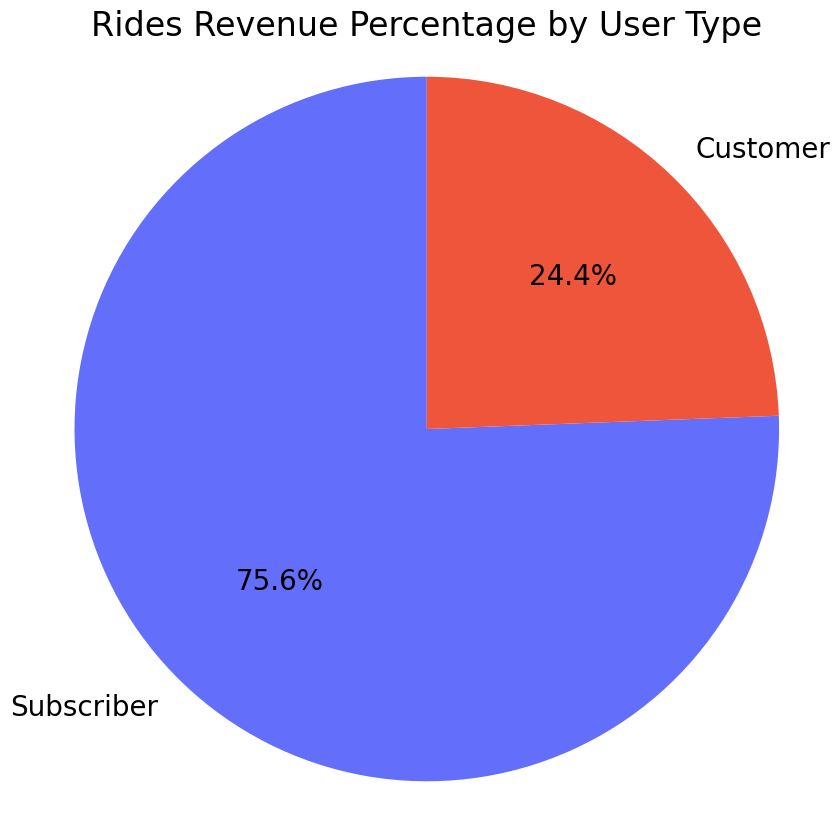

In [ ]:
labels = revenue_by_user_pd["user_type"]
sizes = revenue_by_user_pd["percent"]
colors = ['#636EFA','#EF553B']

fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

plt.title('Rides Revenue Percentage by User Type')

plt.show()

In [ ]:
# Calculate the revenue generated by each gender
revenue_by_gender = df.groupBy("member_gender").agg(sum("duration_sec").alias("total_duration_sec"))
revenue_by_gender = revenue_by_gender.withColumn("total_revenue", col("total_duration_sec") / 60 * 0.15)

# Calculate the total revenue across all user types
total_revenue = revenue_by_gender.agg(sum("total_revenue")).collect()[0][0]

# Calculate the percentage of revenue generated by each user type
revenue_by_gender = revenue_by_gender.withColumn("percent", round((col("total_revenue") / total_revenue) * 100, 2))

# Print or visualize the results to identify which user type generates the most revenue and which has the most potential for growth
revenue_by_gender.show()


+-------------+------------------+------------------+-------+
|member_gender|total_duration_sec|     total_revenue|percent|
+-------------+------------------+------------------+-------+
|       Female|         101279529|253198.82249999998|  26.83|
|        Other|           6420311|        16050.7775|    1.7|
|         Male|         269751705|       674379.2625|  71.47|
+-------------+------------------+------------------+-------+



In [ ]:
revenue_by_gender_pd = revenue_by_gender.toPandas()

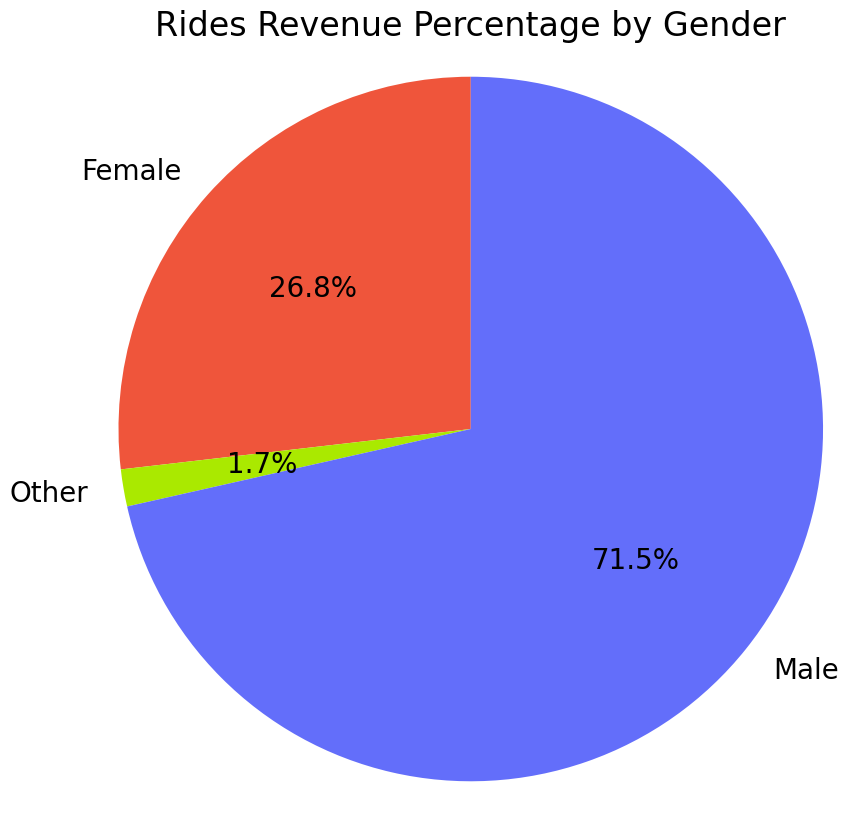

In [ ]:
labels = revenue_by_gender_pd["member_gender"]
sizes = revenue_by_gender_pd["percent"]
colors = ['#EF553B','#AAE900','#636EFA']

fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

plt.title('Rides Revenue Percentage by Gender')

plt.show()

In [ ]:
# Group the customers by age and calculate the average distance and revenue for each age group

# Define age groups
df = df.withColumn('age_group',
                   when(col('age') < 18, 'Under 18')
                   .when((col('age') >= 18) & (col('age') <= 20), '18-20')
                   .when((col('age') > 20) & (col('age') <= 25), '21-25')
                   .when((col('age') > 25) & (col('age') <= 30), '26-30')
                   .when((col('age') > 30) & (col('age') <= 35), '31-35')
                   .when((col('age') > 35) & (col('age') <= 40), '36-40')
                   .when((col('age') > 40) & (col('age') <= 45), '41-45')
                   .when((col('age') > 45) & (col('age') <= 50), '46-50')
                   .when((col('age') > 50) & (col('age') <= 55), '51-55')
                   .when((col('age') > 55) & (col('age') <= 60), '55-60')
                   .when(col('age') > 60, 'Over 60')
                   .otherwise('Unknown'))

age_groups = df.groupBy(col('age_group').alias('age_group')).agg(sum('distance_miles').alias('total_distance'), count('age').alias('total_rides'))

age_groups = age_groups.orderBy(desc('total_rides'))

age_groups.show(10)
age_groups = age_groups.sort("total_rides", ascending=False)


+---------+------------------+-----------+
|age_group|    total_distance|total_rides|
+---------+------------------+-----------+
|    36-40|108798.06000000294|     107300|
|    31-35| 89706.08000000213|      87581|
|    41-45| 74598.84000000001|      74490|
|    46-50| 49048.92999999851|      50450|
|    51-55|37690.859999999135|      37730|
|    26-30|33312.439999999966|      34876|
|    55-60| 28188.84999999936|      29249|
|  Over 60| 26952.14999999965|      29040|
|    21-25|2027.7700000000013|       2443|
+---------+------------------+-----------+



In [ ]:
age_groups_pd = age_groups.toPandas()

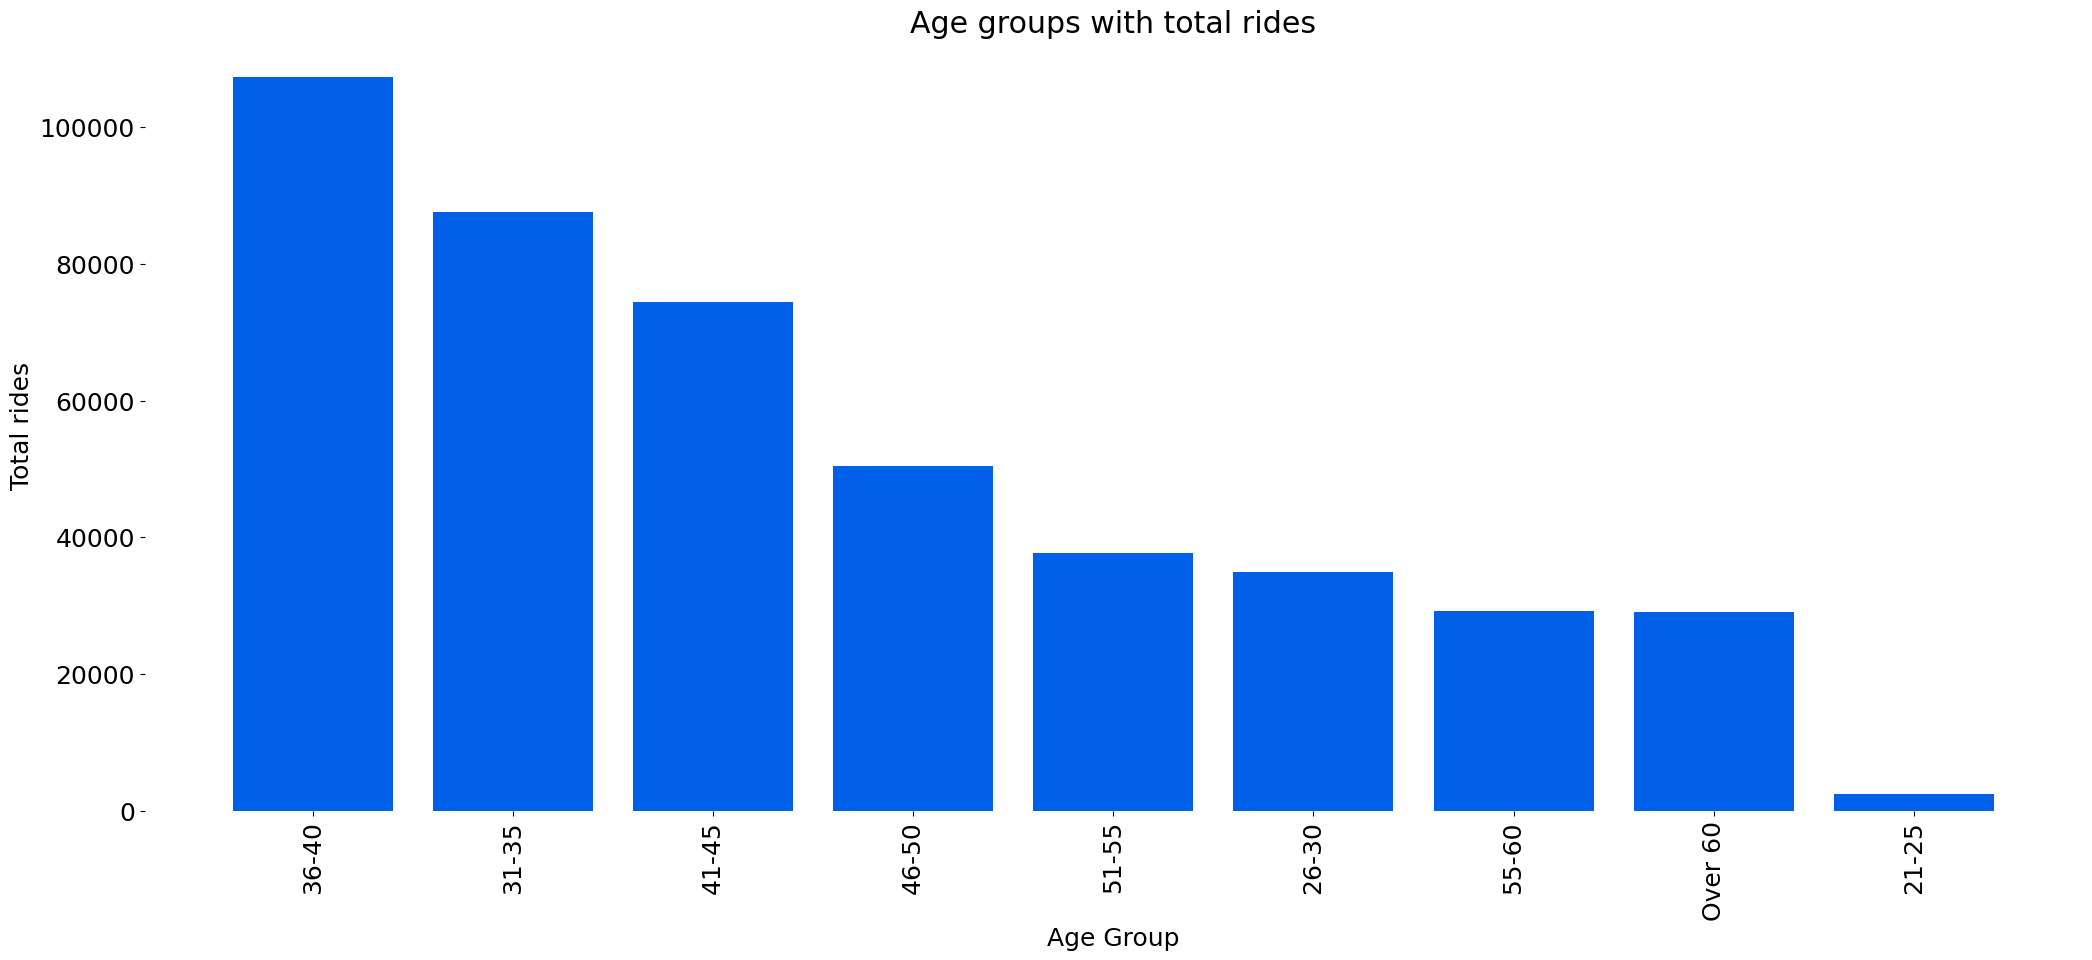

In [ ]:
plt.figure(figsize=(25, 10))
plt.rcParams['font.size'] = 18
plt.bar(age_groups_pd["age_group"].head(10), age_groups_pd["total_rides"].head(10), color = '#0060e8')
plt.title("Age groups with total rides")
#ax.set_facecolor("orange")
plt.xlabel("Age Group")
plt.ylabel("Total rides")
plt.xticks(rotation=90)
plt.gca().set_frame_on(False)
plt.show()

In [ ]:

# Filter data for female users only
female_df = df.filter(col("member_gender") == "Female")

# Group by age group and calculate total distance and revenue
age_groups_f = female_df.groupBy(col("age_group").alias("age_group")).agg(sum("distance_miles").alias("total_distance"), round(sum("trip_fee_USD"), 2).alias("total_revenue"))

# Sort by total revenue in descending order
age_groups_f = age_groups_f.sort(desc("total_revenue"))

# Show the top 10 age groups with the highest revenue
age_groups_f.show(10)


+---------+------------------+-------------+
|age_group|    total_distance|total_revenue|
+---------+------------------+-------------+
|    36-40|26393.449999999815|    142971.78|
|    31-35|24935.789999999673|    139145.53|
|    41-45| 14526.95999999999|     79290.64|
|    26-30| 8619.729999999978|     58165.36|
|    46-50|  9066.76000000001|     55542.29|
|    51-55| 7065.659999999987|     39927.33|
|    55-60| 6038.650000000008|     35018.65|
|  Over 60| 4870.750000000013|      32862.4|
|    21-25| 472.8399999999997|      8147.37|
+---------+------------------+-------------+



In [ ]:
age_groups_f = age_groups_f.toPandas()

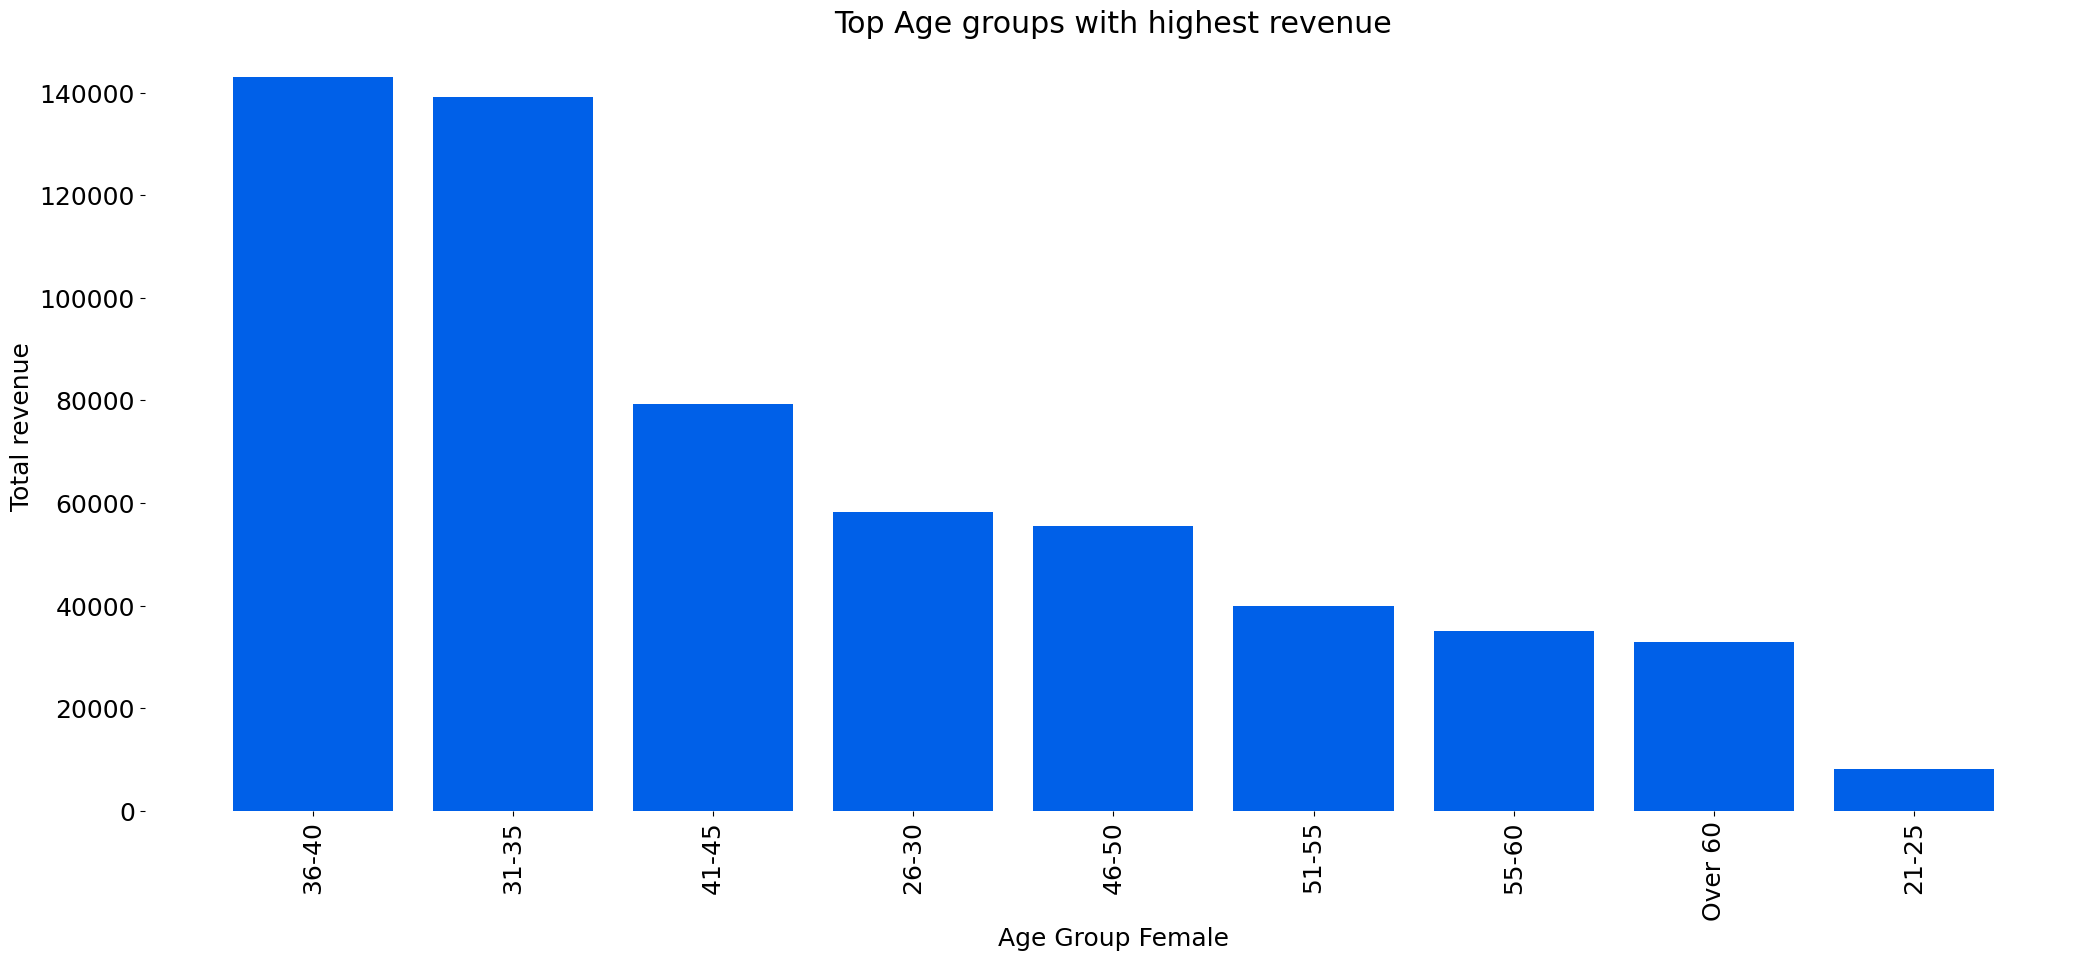

In [ ]:
plt.figure(figsize=(25, 10))
plt.rcParams['font.size'] = 18
plt.bar(age_groups_f["age_group"].head(10), age_groups_f["total_revenue"].head(10), color = '#0060E8')
plt.title("Top Age groups with highest revenue")
#ax.set_facecolor("orange")
plt.xlabel("Age Group Female")
plt.ylabel("Total revenue")
plt.xticks(rotation=90)
plt.gca().set_frame_on(False)
plt.show()

In [ ]:
# Filter data for female users only
male_df = df.filter(col("member_gender") == "Male")

# Group by age group and calculate total distance and revenue
age_groups_m = male_df.groupBy(col("age_group").alias("age_group")).agg(sum("distance_miles").alias("total_distance"), round(sum("trip_fee_USD"), 2).alias("total_revenue"))

# Sort by total revenue in descending order
age_groups_m = age_groups_m.sort(desc("total_revenue"))

# Show the top 10 age groups with the highest revenue
age_groups_m.show(10)

+---------+------------------+-------------+
|age_group|    total_distance|total_revenue|
+---------+------------------+-------------+
|    36-40| 81135.10000000027|    365203.56|
|    31-35|63399.379999999546|    277080.65|
|    41-45|58995.529999998194|    254581.59|
|    46-50|39152.469999998546|    177245.91|
|    51-55| 30138.47999999914|    139721.43|
|    26-30|24222.369999999726|    127329.79|
|  Over 60| 21755.29999999988|    114813.69|
|    55-60|21713.539999999848|     103755.6|
|    21-25| 1550.149999999999|      14814.2|
+---------+------------------+-------------+



In [ ]:
age_groups_m = age_groups_m.toPandas()

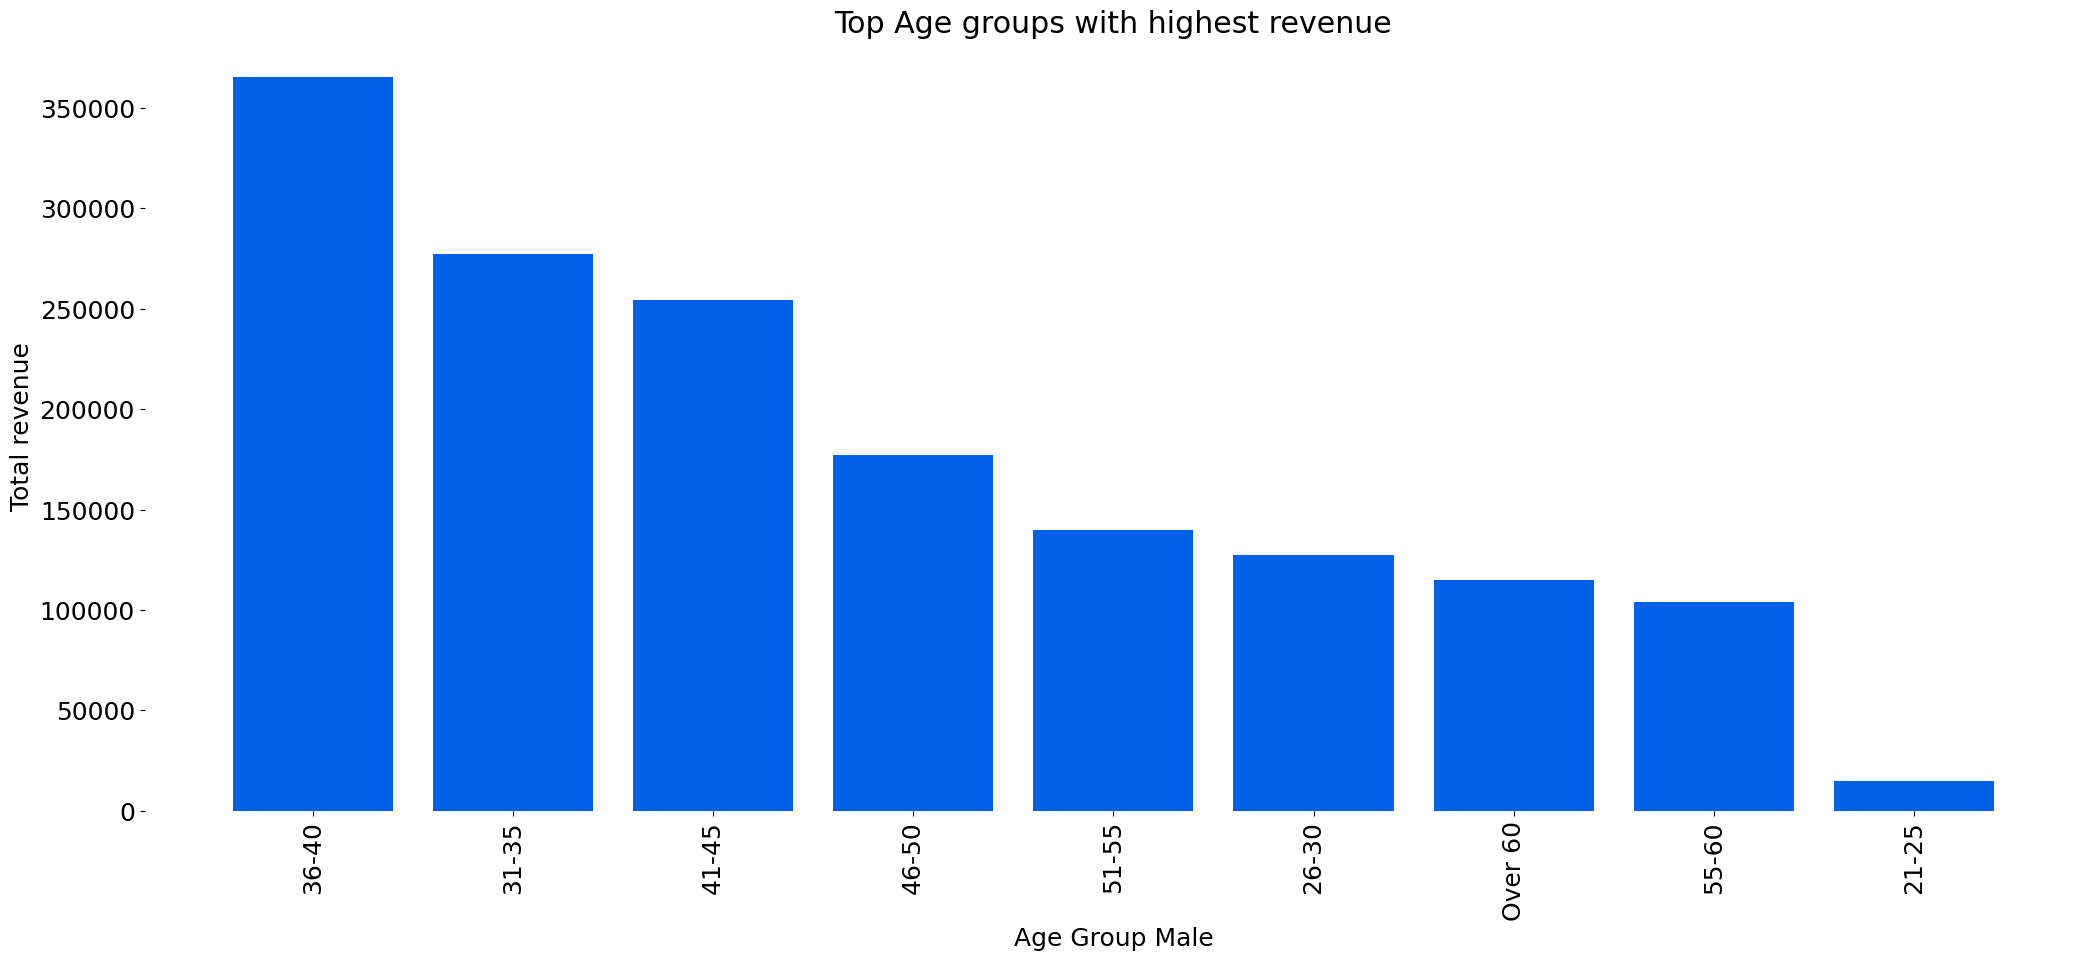

In [ ]:
plt.figure(figsize=(25, 10))
plt.rcParams['font.size'] = 18
plt.bar(age_groups_m["age_group"].head(10), age_groups_m["total_revenue"].head(10), color = '#0060E8')
plt.title("Top Age groups with highest revenue")
#ax.set_facecolor("orange")
plt.xlabel("Age Group Male")
plt.ylabel("Total revenue")
plt.xticks(rotation=90)
plt.gca().set_frame_on(False)
plt.show()

In [ ]:
df.show()

+------------+--------------------+--------------------+----------------+--------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+-------+----------+-----------------+-------------+--------------+-------------------+------------+---+-----------------+-----------------+---------+
|duration_sec|          start_time|            end_time|start_station_id|  start_station_name|start_station_latitude|start_station_longitude|end_station_id|    end_station_name|end_station_latitude|end_station_longitude|bike_id| user_type|member_birth_year|member_gender|distance_miles|Duration_In_Seconds|trip_fee_USD|age|start_hour_of_day|start_time_of_day|age_group|
+------------+--------------------+--------------------+----------------+--------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+-------+----------+-----------------+---

In [ ]:
df = df.withColumn("day_of_week", dayofweek(df.start_time))
df.show()

+------------+--------------------+--------------------+----------------+--------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+-------+----------+-----------------+-------------+--------------+-------------------+------------+---+-----------------+-----------------+---------+-----------+
|duration_sec|          start_time|            end_time|start_station_id|  start_station_name|start_station_latitude|start_station_longitude|end_station_id|    end_station_name|end_station_latitude|end_station_longitude|bike_id| user_type|member_birth_year|member_gender|distance_miles|Duration_In_Seconds|trip_fee_USD|age|start_hour_of_day|start_time_of_day|age_group|day_of_week|
+------------+--------------------+--------------------+----------------+--------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+-------+--------

In [ ]:
df = df.withColumn("day", when(df.day_of_week == 1, "monday")
                          .when(df.day_of_week == 2, "tuesday")
                          .when(df.day_of_week == 3, "wednesday")
                          .when(df.day_of_week == 4, "thursday")
                          .when(df.day_of_week == 5, "friday")
                          .when(df.day_of_week == 6, "saturday")
                          .when(df.day_of_week == 7, "sunday")
                          .otherwise("weird day"))
rides_per_day_df = df.groupBy("day", "user_type").agg(count(col("user_type")).alias("num_rides"))
rides_per_day_df.show()

+---------+----------+---------+
|      day| user_type|num_rides|
+---------+----------+---------+
|   monday|  Customer|     7595|
| thursday|Subscriber|    74009|
|   friday|  Customer|     6580|
|  tuesday|  Customer|     5800|
|   friday|Subscriber|    70618|
|  tuesday|Subscriber|    67736|
| saturday|  Customer|     7659|
|   monday|Subscriber|    25193|
| thursday|  Customer|     6348|
|wednesday|Subscriber|    74212|
|wednesday|  Customer|     6270|
| saturday|Subscriber|    64359|
|   sunday|Subscriber|    28297|
|   sunday|  Customer|     8483|
+---------+----------+---------+



In [ ]:
import plotly.graph_objs as go

# Group the data by user type and gender and calculate the total revenue
revenue_by_user_type_gender = df.groupBy(['user_type', 'member_gender']).agg(sum('trip_fee_USD').alias('total_revenue'))

# Convert the PySpark DataFrame to a Pandas DataFrame for plotting with Plotly
revenue_by_user_type_gender_pd = revenue_by_user_type_gender.toPandas()

# Create a stacked bar chart to show the revenue by user type and gender
fig = go.Figure(data=[go.Bar(name='Male', x=revenue_by_user_type_gender_pd[revenue_by_user_type_gender_pd['member_gender']=='Male']['user_type'], y=revenue_by_user_type_gender_pd[revenue_by_user_type_gender_pd['member_gender']=='Male']['total_revenue']),
                      go.Bar(name='Female', x=revenue_by_user_type_gender_pd[revenue_by_user_type_gender_pd['member_gender']=='Female']['user_type'], y=revenue_by_user_type_gender_pd[revenue_by_user_type_gender_pd['member_gender']=='Female']['total_revenue'])])

fig.update_layout(title='Revenue by User Type and Gender',
                  xaxis_title='User Type',
                  yaxis_title='Total Revenue')
fig.show()


In [ ]:
rides_per_day_of_week_df = df.groupBy('day_of_week', 'user_type').agg(count('*').alias('num_rides'))

# Pivot the user_type column to create separate columns for Customer and Subscriber
pivoted_rides_df = rides_per_day_of_week_df.groupBy('day_of_week').pivot('user_type').agg(sum('num_rides')).orderBy('day_of_week')
pivoted_rides_df_pd = pivoted_rides_df.toPandas()

# Create the Plotly figure
fig = go.Figure()
fig.add_trace(go.Scatter(x=pivoted_rides_df_pd['day'], y=pivoted_rides_df_pd['Customer'], mode='lines+markers', name='Customer'))
fig.add_trace(go.Scatter(x=pivoted_rides_df_pd['day'], y=pivoted_rides_df_pd['Subscriber'], mode='lines+markers', name='Subscriber'))
fig.update_layout(title='Rides per Day of Week by User Type', xaxis_title='Day of Week (1=Mon, 7=Sun)', yaxis_title='Number of Rides')

# Show the Plotly figure
fig.show()


In [ ]:

# Convert the 'start_time' column to a month format
df = df.withColumn('start_month', date_format('start_time', 'M').cast(IntegerType()))

rides_per_month_df = df.groupBy('start_month', 'user_type').agg(count('*').alias('num_rides'))

# Pivot the user_type column to create separate columns for Customer and Subscriber
pivoted_rides_df = rides_per_month_df.groupBy('start_month').pivot('user_type').agg(sum('num_rides')).orderBy('start_month')
pivoted_rides_df = pivoted_rides_df.toPandas()

# Create the Plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=pivoted_rides_df['start_month'], y=pivoted_rides_df['Customer'], mode='lines+markers', name='Customer'))
fig.add_trace(go.Scatter(x=pivoted_rides_df['start_month'], y=pivoted_rides_df['Subscriber'], mode='lines+markers', name='Subscriber'))
fig.update_layout(title='Rides per Month by User Type', xaxis_title='Month', yaxis_title='Number of Rides')
fig.show()


In [ ]:
rides_per_month_df.show()

+-----------+----------+---------+
|start_month| user_type|num_rides|
+-----------+----------+---------+
|         11|  Customer|     8331|
|         12|Subscriber|    72014|
|         12|  Customer|     6222|
|         10|  Customer|     9058|
|         11|Subscriber|    77759|
|         10|Subscriber|    86258|
|          7|Subscriber|    31095|
|          8|  Customer|     9012|
|          6|  Customer|      148|
|          7|  Customer|     4815|
|          6|Subscriber|     2239|
|          8|Subscriber|    60771|
|          9|  Customer|    11149|
|          9|Subscriber|    74288|
+-----------+----------+---------+

